# SMOTE - Synthetic Minority Oversampling Technique

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE helps by generating synthetic samples rather than just duplicating the minority class instances. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

### How SMOTE Works:

1) Identify the Minority Class: SMOTE focuses on the minority class in a dataset, which is the class that has fewer examples.

2) Select Neighbors: For each data point in the minority class, SMOTE selects one or more of its nearest neighbors from the same class.

3) Generate Synthetic Samples: SMOTE generates synthetic samples by interpolating between the selected point and its neighbors. The synthetic sample is created by choosing a point along the line connecting the data point to its neighbor, based on a random factor.

4) Repeat the Process: This process is repeated for each point in the minority class until the desired number of synthetic samples is generated.

In [2]:
from sklearn.datasets import make_classification

## The make_classification function from sklearn.datasets is a utility to generate a synthetic classification dataset...

In [3]:
X,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

## The make_classification function generates synthetic classification datasets with a default binary classification setup. That means here it creates only two classes: 0 and 1...
## n_samples=1000 : This specifies that the dataset will contain 1000 samples (data points).
## n_redundant=0 : This means no redundant features will be generated. Redundant features are linear combinations of the informative features, and since n_redundant=0, there won't be any such features in this dataset.
## n_features=2 : The dataset will have 2 features (columns). These are the input variables for each sample.
## n_clusters_per_class=1 : This defines that each class (label) will have 1 cluster of samples. In other words, all samples of a particular class will be close to each other in the feature space.
## weights=[0.90] : The weights parameter specifies the proportion of samples assigned to each class. Here, [0.90] indicates that 90% of the samples will belong to the first class, and the remaining 10% will automatically 
# belong to the second class.This will create a class imbalance, with one class having 90% of the samples and the other having only 10%.
## random_state=12 : This is used to ensure that the dataset generation is reproducible. If you use the same random_state in future runs, the random process will generate the same dataset.

In [4]:
import pandas as pd

In [5]:
df1 = pd.DataFrame(X,columns=['A','B'])
df2 = pd.DataFrame(y,columns=['Target'])

final_df = pd.concat([df1,df2],axis=1)

final_df

,A,B,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [6]:
final_df['Target'].value_counts()

Target
0    900
1    100
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt

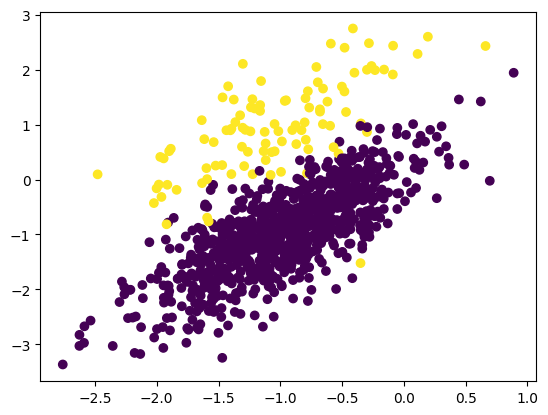

In [8]:
plt.scatter(final_df['A'],final_df['B'],c=final_df['Target'])

## final_df['A']: The x-axis values 
## final_df['B']: The y-axis values 
## c=final_df['Target']: Sets the color of the points based on the values in the Target column (0 and 1).

plt.show()

In [9]:
## In order to apply SMOTE we will apply one library imblearn (imbalanced learn)...
!pip install imblearn

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
## transforming the dataset using SMOTE...

oversample = SMOTE()

X,y = oversample.fit_resample(final_df[['A','B']],final_df['Target'])


#### Inputs

1) final_df[['A', 'B']] : This selects the features A and B from the DataFrame final_df. These are the independent variables (inputs) for the SMOTE process.

2) final_df['Target'] : The Target column contains the dependent variable (class labels). SMOTE uses this to identify the minority and majority classes in the dataset.


**What Happens?**

1) Detect Class Imbalance : SMOTE checks the distribution of the Target column to identify which class is the minority (e.g., 0 or 1).

2) Generate Synthetic Samples : SMOTE creates synthetic samples for the minority class by interpolating between its existing samples.
It uses the nearest neighbors (controlled by the k_neighbors parameter) to determine how to interpolate.

In [12]:
len(y[y==0])

900

In [13]:
len(y[y==1])

## now the number of 0 and 1 are equal...

900

In [14]:
df1 = pd.DataFrame(X,columns=['A','B'])
df2 = pd.DataFrame(y,columns=['Target'])

oversample_df = pd.concat([df1,df2],axis=1)

oversample_df

,A,B,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-2.148760,0.300562,1
1796,-1.633693,-0.065878,1
1797,-1.857063,-0.185041,1
1798,-1.324746,0.911961,1


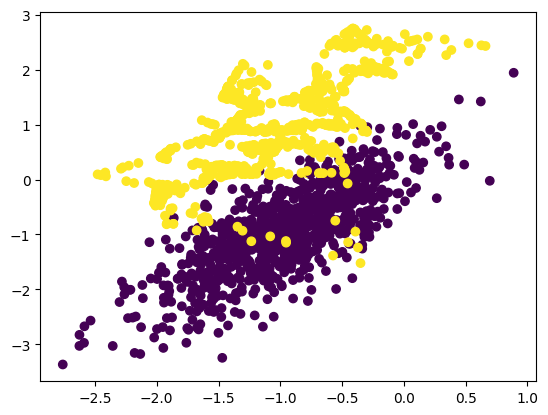

In [15]:
plt.scatter(oversample_df['A'],oversample_df['B'],c=oversample_df['Target'])

plt.show()